In [191]:
import sqlite3,csv
conn= sqlite3.connect('fifa_data.db')
cursor = conn.cursor()

In [192]:
import pandas as pd
from pandas.io.sql import to_sql
import numpy as np
#from google.colab import files
#import io

In [193]:
col76_dtype = str
df = pd.read_csv("C:\\Users\\vktof\\OneDrive\\Desktop\\fifa21_data.csv", dtype={'Column76Name': col76_dtype}, low_memory=False)

In [194]:
df = df.rename(columns = {'↓OVA' : 'OVA'})

In [195]:
chunksize = 1000  # Adjust the chunk size as needed
for chunk in np.array_split(df, len(df) / chunksize):
    chunk.to_sql("fifa_data_cleaning", conn, if_exists='append', index=False, method="multi")


In [196]:
asd= pd.read_sql_query(" select * from fifa_data_cleaning" , conn)
asd

ID               Name                      LongName  \
0       158023           L. Messi                  Lionel Messi   
1        20801  Cristiano Ronaldo  C. Ronaldo dos Santos Aveiro   
2       200389           J. Oblak                     Jan Oblak   
3       192985       K. De Bruyne               Kevin De Bruyne   
4       190871          Neymar Jr    Neymar da Silva Santos Jr.   
...        ...                ...                           ...   
322638  247223             Xia Ao                        Ao Xia   
322639  258760           B. Hough                     Ben Hough   
322640  252757        R. McKinley                Ronan McKinley   
322641  243790       Wang Zhen'ao                  Zhen'ao Wang   
322642  252520          Zhou Xiao                     Xiao Zhou   

                                                photoUrl  \
0       https://cdn.sofifa.com/players/158/023/21_60.png   
1       https://cdn.sofifa.com/players/020/801/21_60.png   
2       https://cdn.sofifa.com/players/200/389/21_60.png   
3       https://cdn.sofifa.com/players/192/985/21_60.png   
4       https://cdn.sofifa.com/players/190/871/21_60.png   
...                                                  ...   
322638  https://cdn.sofifa.com/players/247/223/21_60.png   
322639  https://cdn.sofifa.com/players/258/760/21_60.png   
322640  https://cdn.sofifa.com/players/252/757/21_60.png   
322641  https://cdn.sofifa.com/players/243/790/21_60.png   
322642  https://cdn.sofifa.com/players/252/520/21_60.png   

                                                playerUrl Nationality  Age  \
0       http://sofifa.com/player/158023/lionel-messi/2...   Argentina   33   
1       http://sofifa.com/player/20801/c-ronaldo-dos-s...    Portugal   35   
2       http://sofifa.com/player/200389/jan-oblak/210006/    Slovenia   27   
3       http://sofifa.com/player/192985/kevin-de-bruyn...     Belgium   29   
4       http://sofifa.com/player/190871/neymar-da-silv...      Brazil   28   
...                                                   ...         ...  ...   
322638     http://sofifa.com/player/247223/ao-xia/210006/    China PR   21   
322639  http://sofifa.com/player/258760/ben-hough/210006/     England   17   
322640  http://sofifa.com/player/252757/ronan-mckinley...     England   18   
322641  http://sofifa.com/player/243790/zhenao-wang/21...    China PR   20   
322642  http://sofifa.com/player/252520/xiao-zhou/210006/    China PR   21   

        OVA  POT                      Club  ...     D/W   IR PAC SHO PAS  DRI  \
0        93   93              FC Barcelona  ...     Low  5 ★  85  92  91   95   
1        92   92                  Juventus  ...     Low  5 ★  89  93  81   89   
2        91   93           Atlético Madrid  ...  Medium  3 ★  87  92  78   90   
3        91   91           Manchester City  ...    High  4 ★  76  86  93   88   
4        91   91       Paris Saint-Germain  ...  Medium  5 ★  91  85  86   94   
...     ...  ...                       ...  ...     ...  ...  ..  ..  ..  ...   
322638   47   55        \n\n\n\nWuhan Zall  ...  Medium  1 ★  64  28  26   38   
322639   47   67   \n\n\n\nOldham Athletic  ...  Medium  1 ★  64  40  48   49   
322640   47   65        \n\n\n\nDerry City  ...  Medium  1 ★  63  39  44   46   
322641   47   57  \n\n\n\nDalian YiFang FC  ...  Medium  1 ★  58  49  41   49   
322642   47   57  \n\n\n\nDalian YiFang FC  ...  Medium  1 ★  62  22  39   42   

       DEF PHY  Hits contract_modify  
0       38  65   771            None  
1       35  77   562            None  
2       52  90   150            None  
3       64  78   207            None  
4       36  59   595            None  
...     ..  ..   ...             ...  
322638  48  51  None            None  
322639  35  45  None            None  
322640  40  53  None            None  
322641  30  44  None            None  
322642  45  55  None            None  

[322643 rows x 78 columns]

In [197]:
df.head()

ID               Name                      LongName  \
0  158023           L. Messi                  Lionel Messi   
1   20801  Cristiano Ronaldo  C. Ronaldo dos Santos Aveiro   
2  200389           J. Oblak                     Jan Oblak   
3  192985       K. De Bruyne               Kevin De Bruyne   
4  190871          Neymar Jr    Neymar da Silva Santos Jr.   

                                           photoUrl  \
0  https://cdn.sofifa.com/players/158/023/21_60.png   
1  https://cdn.sofifa.com/players/020/801/21_60.png   
2  https://cdn.sofifa.com/players/200/389/21_60.png   
3  https://cdn.sofifa.com/players/192/985/21_60.png   
4  https://cdn.sofifa.com/players/190/871/21_60.png   

                                           playerUrl Nationality  Age  OVA  \
0  http://sofifa.com/player/158023/lionel-messi/2...   Argentina   33   93   
1  http://sofifa.com/player/20801/c-ronaldo-dos-s...    Portugal   35   92   
2  http://sofifa.com/player/200389/jan-oblak/210006/    Slovenia   27   91   
3  http://sofifa.com/player/192985/kevin-de-bruyn...     Belgium   29   91   
4  http://sofifa.com/player/190871/neymar-da-silv...      Brazil   28   91   

   POT                         Club  ...     A/W     D/W   IR PAC SHO  PAS  \
0   93         \n\n\n\nFC Barcelona  ...  Medium     Low  5 ★  85  92   91   
1   92             \n\n\n\nJuventus  ...    High     Low  5 ★  89  93   81   
2   93      \n\n\n\nAtlético Madrid  ...  Medium  Medium  3 ★  87  92   78   
3   91      \n\n\n\nManchester City  ...    High    High  4 ★  76  86   93   
4   91  \n\n\n\nParis Saint-Germain  ...    High  Medium  5 ★  91  85   86   

  DRI DEF PHY Hits  
0  95  38  65  771  
1  89  35  77  562  
2  90  52  90  150  
3  88  64  78  207  
4  94  36  59  595  

[5 rows x 77 columns]

 CONVERT HEIGHT ,WEIGHT COLUMN WHICH CONTAIN STRING AS WELL AS NUMERIC  TO NUMERIC  AND THEN UPDATE THAT IN PRIGNAL TABLE

In [21]:
#df['Height'].unique()
dis_we_hi = pd.read_sql_query(" select Height,Weight , count(*) from fifa_data_cleaning group by Height,Weight limit 10 ",conn)
dis_we_hi


Height Weight  count(*)
0    155    155         4
1    155     57         6
2  155cm   57kg         4
3    156    156         4
4    156     58         6
5  156cm   58kg         4
6    157    157         4
7    157     71         6
8  157cm   71kg         4
9    158    158        12

In [22]:
cursor.execute (" UPDATE fifa_data_cleaning SET Weight =CAST(Weight AS DECIMAL(5, 2)); ")
for x in cursor:
    print(x)

In [23]:
#asddf = pd.read_sql_query(" select Height ,Weight ,Age from fifa_data_cleaning",conn)
#asddf
for he in df[['Height','Weight']]:
    values = df[he].unique()
    print(f'{he}-{values}.\n')


Height-['170cm' '187cm' '188cm' '181cm' '175cm' '184cm' '191cm' '178cm' '193cm'
 '185cm' '199cm' '173cm' '168cm' '176cm' '177cm' '183cm' '180cm' '189cm'
 '179cm' '195cm' '172cm' '182cm' '186cm' '192cm' '165cm' '194cm' '167cm'
 '196cm' '163cm' '190cm' '174cm' '169cm' '171cm' '197cm' '200cm' '166cm'
 '6\'2"' '164cm' '198cm' '6\'3"' '6\'5"' '5\'11"' '6\'4"' '6\'1"' '6\'0"'
 '5\'10"' '5\'9"' '5\'6"' '5\'7"' '5\'4"' '201cm' '158cm' '162cm' '161cm'
 '160cm' '203cm' '157cm' '156cm' '202cm' '159cm' '206cm' '155cm'].

Weight-['72kg' '83kg' '87kg' '70kg' '68kg' '80kg' '71kg' '91kg' '73kg' '85kg'
 '92kg' '69kg' '84kg' '96kg' '81kg' '82kg' '75kg' '86kg' '89kg' '74kg'
 '76kg' '64kg' '78kg' '90kg' '66kg' '60kg' '94kg' '79kg' '67kg' '65kg'
 '59kg' '61kg' '93kg' '88kg' '97kg' '77kg' '62kg' '63kg' '95kg' '100kg'
 '58kg' '183lbs' '179lbs' '172lbs' '196lbs' '176lbs' '185lbs' '170lbs'
 '203lbs' '168lbs' '161lbs' '146lbs' '130lbs' '190lbs' '174lbs' '148lbs'
 '165lbs' '159lbs' '192lbs' '181lbs' '139lbs' '15

In [668]:
cursor.execute("""select distinct(Height) from fifa_data_cleaning """)
for x in cursor:
    print(x) 

('170',)
('187',)
('188',)
('181',)
('175',)
('184',)
('191',)
('178',)
('193',)
('185',)
('199',)
('173',)
('168',)
('176',)
('177',)
('183',)
('180',)
('189',)
('179',)
('195',)
('172',)
('182',)
('186',)
('192',)
('165',)
('194',)
('167',)
('196',)
('163',)
('190',)
('174',)
('169',)
('171',)
('197',)
('200',)
('166',)
('6',)
('164',)
('198',)
('5',)
('201',)
('158',)
('162',)
('161',)
('160',)
('203',)
('157',)
('156',)
('202',)
('159',)
('206',)
('155',)
('170cm',)
('187cm',)
('188cm',)
('181cm',)
('175cm',)
('184cm',)
('191cm',)
('178cm',)
('193cm',)
('185cm',)
('199cm',)
('173cm',)
('168cm',)
('176cm',)
('177cm',)
('183cm',)
('180cm',)
('189cm',)
('179cm',)
('195cm',)
('172cm',)
('182cm',)
('186cm',)
('192cm',)
('165cm',)
('194cm',)
('167cm',)
('196cm',)
('163cm',)
('190cm',)
('174cm',)
('169cm',)
('171cm',)
('197cm',)
('200cm',)
('166cm',)
('6\'2"',)
('164cm',)
('198cm',)
('6\'3"',)
('6\'5"',)
('5\'11"',)
('6\'4"',)
('6\'1"',)
('6\'0"',)
('5\'10"',)
('5\'9"',)
('5\'6"',)
('5\'7

In [24]:
ast=cursor.execute (" UPDATE fifa_data_cleaning SET Height =CAST(Height AS DECIMAL(5, 2)); ")
for x in ast:
    print(x)

In [27]:
cursor.execute("""select Height, weight, count() from fifa_data_cleaning group by Height,Weight limit 10""")


In [28]:
for x in cursor :
    print(x)

('155', '155', 4)
('155', '57', 10)
('156', '156', 4)
('156', '58', 10)
('157', '157', 4)
('157', '71', 10)
('158', '158', 12)
('158', '56', 20)
('158', '58', 10)
('159', '159', 8)


In [29]:
pd.read_sql_query("""select Height, weight from fifa_data_cleaning limit 10 """,conn)

Height Weight
0    170    170
1    187    187
2    188    188
3    181    181
4    175    175
5    184    184
6    175    175
7    191    191
8    178    178
9    187    187

In [673]:
for he in df[['Height','Weight']]:
    values = df[he].unique()
    print(f'{he}-{values}.\n')

Height-['170cm' '187cm' '188cm' '181cm' '175cm' '184cm' '191cm' '178cm' '193cm'
 '185cm' '199cm' '173cm' '168cm' '176cm' '177cm' '183cm' '180cm' '189cm'
 '179cm' '195cm' '172cm' '182cm' '186cm' '192cm' '165cm' '194cm' '167cm'
 '196cm' '163cm' '190cm' '174cm' '169cm' '171cm' '197cm' '200cm' '166cm'
 '6\'2"' '164cm' '198cm' '6\'3"' '6\'5"' '5\'11"' '6\'4"' '6\'1"' '6\'0"'
 '5\'10"' '5\'9"' '5\'6"' '5\'7"' '5\'4"' '201cm' '158cm' '162cm' '161cm'
 '160cm' '203cm' '157cm' '156cm' '202cm' '159cm' '206cm' '155cm'].

Weight-['72kg' '83kg' '87kg' '70kg' '68kg' '80kg' '71kg' '91kg' '73kg' '85kg'
 '92kg' '69kg' '84kg' '96kg' '81kg' '82kg' '75kg' '86kg' '89kg' '74kg'
 '76kg' '64kg' '78kg' '90kg' '66kg' '60kg' '94kg' '79kg' '67kg' '65kg'
 '59kg' '61kg' '93kg' '88kg' '97kg' '77kg' '62kg' '63kg' '95kg' '100kg'
 '58kg' '183lbs' '179lbs' '172lbs' '196lbs' '176lbs' '185lbs' '170lbs'
 '203lbs' '168lbs' '161lbs' '146lbs' '130lbs' '190lbs' '174lbs' '148lbs'
 '165lbs' '159lbs' '192lbs' '181lbs' '139lbs' '15

# Remove the  unnecessary newline characters from all columns that have them.

In [31]:
#df["Club"].head()
cursor.execute("select  REPLACE(Club, '\n', '') from fifa_data_cleaning limit 5" )
for x in cursor:
    print(x)

('FC Barcelona',)
('Juventus',)
('Atlético Madrid',)
('Manchester City',)
('Paris Saint-Germain',)


In [32]:
cursor.execute(" UPDATE fifa_data_cleaning SET Club = REPLACE(Club, '\n', '') ")

In [33]:
#cursor.execute(" UPDATE fifa_data_cleaning SET Club = REPLACE(Club, '\n', '') ")
pd.read_sql_query("select age,Height,Weight,Club from fifa_data_cleaning limit 10",conn)


Age Height Weight                 Club
0   33    170    170         FC Barcelona
1   35    187    187             Juventus
2   27    188    188      Atlético Madrid
3   29    181    181      Manchester City
4   28    175    175  Paris Saint-Germain
5   31    184    184    FC Bayern München
6   28    175    175            Liverpool
7   27    191    191            Liverpool
8   21    178    178  Paris Saint-Germain
9   28    187    187         FC Barcelona

CHECKING WHICH COLUMN HAS NEWLINES CHARACTERS

In [34]:
# Create an empty list to store columns with newline characters
columns_with_newlines = []

# Iterate through columns and check for newline characters
for column in df.columns:
    if df[column].apply(lambda x: '\n' in str(x)).any():
        columns_with_newlines.append(column)

# Display columns with newline characters
if columns_with_newlines:
    print("Columns with unnecessary newline characters:")
    for col in columns_with_newlines:
        print(col)
else:
    print("No columns with unnecessary newline characters found.")


Columns with unnecessary newline characters:
Club


                           RENAME COLUMN  ↓OVA TO OVA 

In [35]:
fifa_data_cleaning = cursor.execute("ALTER table fifa_data_cleaning rename column ↓OVA to OVA ")
fifa_data_cleaning

OperationalError: no such column: "↓OVA"

In [36]:
df = df.rename(columns = {'↓OVA' : 'OVA'})

In [37]:
chunksize = 1000  # Adjust the chunk size as needed
for chunk in np.array_split(df, len(df) / chunksize):
    chunk.to_sql("fifa_data_cleaning", conn, if_exists='append', index=False, method="multi")

                         ADDING  % SIGN IN COLUMN  OVA,POT ,BOV

In [40]:
# ADD % SIGN IN OVA column 
query = "SELECT COALESCE(OVA || '%', 'N/A') AS OVA FROM fifa_data_cleaning  limit 10"

# Execute the query and read the results into a DataFrame
result_df = pd.read_sql_query(query, conn)
result_df

OVA
0  93%
1  92%
2  91%
3  91%
4  91%
5  91%
6  90%
7  90%
8  90%
9  90%

In [41]:
query = "SELECT COALESCE(OVA || '%', 'N/A') AS OVA, COALESCE(POT || '%', 'N/A') AS POT, COALESCE(BOV || '%', 'N/A') AS BOV FROM fifa_data_cleaning limit 10"

# Execute the query and read the results into a DataFrame
result_df = pd.read_sql_query(query, conn)
result_df

OVA  POT  BOV
0  93%  93%  93%
1  92%  92%  92%
2  91%  93%  91%
3  91%  91%  91%
4  91%  91%  91%
5  91%  91%  91%
6  90%  90%  90%
7  90%  91%  90%
8  90%  95%  91%
9  90%  93%  90%

In [50]:
#pd.read_sql_query('select Age,OVA,POT,BOV FROM fifa_data_cleaning',conn)
sql_statement = f"PRAGMA table_info({'fifa_data_cleaning'})"

# Execute the SQL query
cursor.execute(sql_statement)

# Fetch and print the results
results = cursor.fetchall()
for row in results:
    column_name, data_type = row[1], row[2]
    print(f"Column: {column_name}, Data Type: {data_type}")

    

Column: ID, Data Type: INTEGER
Column: Name, Data Type: TEXT
Column: LongName, Data Type: TEXT
Column: photoUrl, Data Type: TEXT
Column: playerUrl, Data Type: TEXT
Column: Nationality, Data Type: TEXT
Column: Age, Data Type: INTEGER
Column: OVA, Data Type: INTEGER
Column: POT, Data Type: INTEGER
Column: Club, Data Type: TEXT
Column: Contract, Data Type: TEXT
Column: Positions, Data Type: TEXT
Column: Height, Data Type: TEXT
Column: Weight, Data Type: TEXT
Column: Preferred Foot, Data Type: TEXT
Column: BOV, Data Type: INTEGER
Column: Best Position, Data Type: TEXT
Column: Joined, Data Type: TEXT
Column: Loan Date End, Data Type: TEXT
Column: Value, Data Type: TEXT
Column: Wage, Data Type: TEXT
Column: Release Clause, Data Type: TEXT
Column: Attacking, Data Type: INTEGER
Column: Crossing, Data Type: INTEGER
Column: Finishing, Data Type: INTEGER
Column: Heading Accuracy, Data Type: INTEGER
Column: Short Passing, Data Type: INTEGER
Column: Volleys, Data Type: INTEGER
Column: Skill, Data T

In [42]:
#conn.commit()
cursor.execute("select count(*) from fifa_data_cleaning")
for x in cursor:
    print(x)

(284685,)


                                FETCH ALL COUMN WHICH INCLUDE IN TABLE

In [43]:
cursor.execute('select count(name)from PRAGMA_TABLE_INFO("fifa_data_cleaning") ')
for x in cursor:
    print(x)

(78,)


 FIND HOW MANY TABLE IN OUR DATABASE

In [44]:
cursor.execute( 'select name from sqlite_master where type = "table"  ')
for x in cursor :
    print(x)


('fifa_data_cleaning',)


 FIND HOW MANY TABLE IN OUR DATABASE

In [45]:
cursor.execute ('select name from sqlite_master where type="table" ')
table_list = [table[0] for table in cursor.fetchall()]
table_list

['fifa_data_cleaning']

In [46]:
cursor.execute ('select name from sqlite_master where type="table" ')
for x in cursor:
    print(x)


('fifa_data_cleaning',)


            FINDING IS THERE ANY NULL VALUE IN OUR TABLE

In [49]:
for table in table_list:
    print('\ntable:', table)
    df_table =pd.read_sql_query(f"select * from {table}",conn)
    print(df_table.isnull().sum())


table: fifa_data_cleaning
ID                      0
Name                    0
LongName                0
photoUrl                0
playerUrl               0
                    ...  
DRI                     0
DEF                     0
PHY                     0
Hits                38925
contract_modify    284685
Length: 78, dtype: int64


                   FINDING DUPLICATES IN TABLE

In [51]:
read_duplicate = pd.read_sql_query("SELECT LongName, Age, Club, Nationality, COUNT(*) as dup FROM fifa_data_cleaning GROUP BY LongName, Age, Club, Nationality HAVING COUNT(*)>1  limit 10",conn)
read_duplicate  

LongName  Age               Club          Nationality  \
0  A. Benjamin Chiamuloira Paes   20      Internacional               Brazil   
1                A.J. DeLaGarza   32        Inter Miami                 Guam   
2               AJ Leitch-Smith   30          Morecambe              England   
3                    Aapo Halme   22           Barnsley              Finland   
4          Aaron Amadi-Holloway   27      Brisbane Roar                Wales   
5                Aaron Anderson   19  Melbourne Victory            Australia   
6            Aaron Appindangoye   28          Sivasspor                Gabon   
7               Aaron Bastiaans   18          VVV-Venlo          Netherlands   
8                  Aaron Berzel   28   Türkgücü München              Germany   
9                  Aaron Bolger   20    Shamrock Rovers  Republic of Ireland   

   dup  
0   14  
1   14  
2   14  
3   14  
4   14  
5   14  
6   14  
7   14  
8   14  
9   14

                   FINDING DUPLICATES IN TABLE

In [52]:
read_duplicates = " SELECT LongName, Age, Club, Nationality, ROW_NUMBER() OVER (PARTITION BY LongName) AS rn FROM fifa_data_cleaning  "
pd.read_sql_query(read_duplicates, conn)

LongName  Age                           Club  \
0       A. Benjamin Chiamuloira Paes   20                  Internacional   
1       A. Benjamin Chiamuloira Paes   20                  Internacional   
2       A. Benjamin Chiamuloira Paes   20                  Internacional   
3       A. Benjamin Chiamuloira Paes   20                  Internacional   
4       A. Benjamin Chiamuloira Paes   20                  Internacional   
...                              ...  ...                            ...   
284680                Ștefan Vlădoiu   21          Universitatea Craiova   
284681                Ștefan Vlădoiu   21          Universitatea Craiova   
284682                Ștefan Vlădoiu   21          Universitatea Craiova   
284683                Ștefan Vlădoiu   21          Universitatea Craiova   
284684                Ștefan Vlădoiu   21  \n\n\n\nUniversitatea Craiova   

       Nationality  rn  
0           Brazil   1  
1           Brazil   2  
2           Brazil   3  
3           Brazil   4  
4           Brazil   5  
...            ...  ..  
284680     Romania  11  
284681     Romania  12  
284682     Romania  13  
284683     Romania  14  
284684     Romania  15  

[284685 rows x 5 columns]

In [53]:
row_duplicate = pd.read_sql_query(" with rowcte as(SELECT *, row_number() over(partition by LongName, Age, Club, Nationality) rn FROM fifa_data_cleaning) select * from rowcte where rn >1  limit 20 ",conn)
row_duplicate 

ID                 Name                      LongName  \
0   230212  Antônio Chiamuloira  A. Benjamin Chiamuloira Paes   
1   230212  Antônio Chiamuloira  A. Benjamin Chiamuloira Paes   
2   230212  Antônio Chiamuloira  A. Benjamin Chiamuloira Paes   
3   230212  Antônio Chiamuloira  A. Benjamin Chiamuloira Paes   
4   230212  Antônio Chiamuloira  A. Benjamin Chiamuloira Paes   
5   230212  Antônio Chiamuloira  A. Benjamin Chiamuloira Paes   
6   230212  Antônio Chiamuloira  A. Benjamin Chiamuloira Paes   
7   230212  Antônio Chiamuloira  A. Benjamin Chiamuloira Paes   
8   230212  Antônio Chiamuloira  A. Benjamin Chiamuloira Paes   
9   230212  Antônio Chiamuloira  A. Benjamin Chiamuloira Paes   
10  230212  Antônio Chiamuloira  A. Benjamin Chiamuloira Paes   
11  230212  Antônio Chiamuloira  A. Benjamin Chiamuloira Paes   
12  230212  Antônio Chiamuloira  A. Benjamin Chiamuloira Paes   
13  190883         A. DeLaGarza                A.J. DeLaGarza   
14  190883         A. DeLaGarza                A.J. DeLaGarza   
15  190883         A. DeLaGarza                A.J. DeLaGarza   
16  190883         A. DeLaGarza                A.J. DeLaGarza   
17  190883         A. DeLaGarza                A.J. DeLaGarza   
18  190883         A. DeLaGarza                A.J. DeLaGarza   
19  190883         A. DeLaGarza                A.J. DeLaGarza   

                                            photoUrl  \
0   https://cdn.sofifa.com/players/230/212/21_60.png   
1   https://cdn.sofifa.com/players/230/212/21_60.png   
2   https://cdn.sofifa.com/players/230/212/21_60.png   
3   https://cdn.sofifa.com/players/230/212/21_60.png   
4   https://cdn.sofifa.com/players/230/212/21_60.png   
5   https://cdn.sofifa.com/players/230/212/21_60.png   
6   https://cdn.sofifa.com/players/230/212/21_60.png   
7   https://cdn.sofifa.com/players/230/212/21_60.png   
8   https://cdn.sofifa.com/players/230/212/21_60.png   
9   https://cdn.sofifa.com/players/230/212/21_60.png   
10  https://cdn.sofifa.com/players/230/212/21_60.png   
11  https://cdn.sofifa.com/players/230/212/21_60.png   
12  https://cdn.sofifa.com/players/230/212/21_60.png   
13  https://cdn.sofifa.com/players/190/883/21_60.png   
14  https://cdn.sofifa.com/players/190/883/21_60.png   
15  https://cdn.sofifa.com/players/190/883/21_60.png   
16  https://cdn.sofifa.com/players/190/883/21_60.png   
17  https://cdn.sofifa.com/players/190/883/21_60.png   
18  https://cdn.sofifa.com/players/190/883/21_60.png   
19  https://cdn.sofifa.com/players/190/883/21_60.png   

                                            playerUrl Nationality  Age  OVA  \
0   http://sofifa.com/player/230212/a-benjamin-chi...      Brazil   20   78   
1   http://sofifa.com/player/230212/a-benjamin-chi...      Brazil   20   78   
2   http://sofifa.com/player/230212/a-benjamin-chi...      Brazil   20   78   
3   http://sofifa.com/player/230212/a-benjamin-chi...      Brazil   20   78   
4   http://sofifa.com/player/230212/a-benjamin-chi...      Brazil   20   78   
5   http://sofifa.com/player/230212/a-benjamin-chi...      Brazil   20   78   
6   http://sofifa.com/player/230212/a-benjamin-chi...      Brazil   20   78   
7   http://sofifa.com/player/230212/a-benjamin-chi...      Brazil   20   78   
8   http://sofifa.com/player/230212/a-benjamin-chi...      Brazil   20   78   
9   http://sofifa.com/player/230212/a-benjamin-chi...      Brazil   20   78   
10  http://sofifa.com/player/230212/a-benjamin-chi...      Brazil   20   78   
11  http://sofifa.com/player/230212/a-benjamin-chi...      Brazil   20   78   
12  http://sofifa.com/player/230212/a-benjamin-chi...      Brazil   20   78   
13  http://sofifa.com/player/190883/aj-delagarza/2...        Guam   32   66   
14  http://sofifa.com/player/190883/aj-delagarza/2...        Guam   32   66   
15  http://sofifa.com/player/190883/aj-delagarza/2...        Guam   32   66   
16  http://sofifa.com/player/190883/aj-delagarza/2...        Guam   32   66   
17  http://sofifa.com/player/190883/aj-dela

In [54]:
# Execute the query
cursor.execute("SELECT LongName, Age, Club, Nationality, COUNT(*) as dup FROM fifa_data_cleaning GROUP BY LongName, Age, Club, Nationality HAVING COUNT(*)>1 ")

# Fetch the results
results = cursor.fetchall()

# Get column names from the cursor description
column_names = [asc[0] for asc in cursor.description]

# Print column names
print(column_names)

# Print the query results
for row in results:
    print(row)


['LongName', 'Age', 'Club', 'Nationality', 'dup']
('A. Benjamin Chiamuloira Paes', 20, 'Internacional', 'Brazil', 14)
('A.J. DeLaGarza', 32, 'Inter Miami', 'Guam', 14)
('AJ Leitch-Smith', 30, 'Morecambe', 'England', 14)
('Aapo Halme', 22, 'Barnsley', 'Finland', 14)
('Aaron Amadi-Holloway', 27, 'Brisbane Roar', 'Wales', 14)
('Aaron Anderson', 19, 'Melbourne Victory', 'Australia', 14)
('Aaron Appindangoye', 28, 'Sivasspor', 'Gabon', 14)
('Aaron Bastiaans', 18, 'VVV-Venlo', 'Netherlands', 14)
('Aaron Berzel', 28, 'Türkgücü München', 'Germany', 14)
('Aaron Bolger', 20, 'Shamrock Rovers', 'Republic of Ireland', 14)
('Aaron Boupendza', 23, 'Hatayspor', 'Gabon', 14)
('Aaron Calver', 24, 'Western United FC', 'Australia', 14)
('Aaron Collins', 23, 'Forest Green Rovers', 'Wales', 14)
('Aaron Connolly', 20, 'Brighton & Hove Albion', 'Republic of Ireland', 14)
('Aaron Cresswell', 30, 'West Ham United', 'England', 14)
('Aaron Dobbs', 21, 'Shelbourne FC', 'Republic of Ireland', 14)
('Aaron Drinan', 

In [706]:
# Execute the query
cursor.execute(" with rowcte as(SELECT LongName, Age, Club, Nationality, row_number() over(partition by LongName, Age, Club, Nationality) rn FROM fifa_data_cleaning) select * from rowcte where rn >1  limit 20")
# Fetch the results
results = cursor.fetchall()
column_names = [asc[0] for asc in cursor.description]
print(column_names)
for row in results:
    print(row)

['LongName', 'Age', 'Club', 'Nationality', 'rn']
('A. Benjamin Chiamuloira Paes', 20, 'Internacional', 'Brazil', 2)
('A. Benjamin Chiamuloira Paes', 20, 'Internacional', 'Brazil', 3)
('A. Benjamin Chiamuloira Paes', 20, 'Internacional', 'Brazil', 4)
('A. Benjamin Chiamuloira Paes', 20, 'Internacional', 'Brazil', 5)
('A. Benjamin Chiamuloira Paes', 20, 'Internacional', 'Brazil', 6)
('A. Benjamin Chiamuloira Paes', 20, 'Internacional', 'Brazil', 7)
('A. Benjamin Chiamuloira Paes', 20, 'Internacional', 'Brazil', 8)
('A. Benjamin Chiamuloira Paes', 20, 'Internacional', 'Brazil', 9)
('A. Benjamin Chiamuloira Paes', 20, 'Internacional', 'Brazil', 10)
('A. Benjamin Chiamuloira Paes', 20, 'Internacional', 'Brazil', 11)
('A.J. DeLaGarza', 32, 'Inter Miami', 'Guam', 2)
('A.J. DeLaGarza', 32, 'Inter Miami', 'Guam', 3)
('A.J. DeLaGarza', 32, 'Inter Miami', 'Guam', 4)
('A.J. DeLaGarza', 32, 'Inter Miami', 'Guam', 5)
('A.J. DeLaGarza', 32, 'Inter Miami', 'Guam', 6)
('A.J. DeLaGarza', 32, 'Inter Miam

In [707]:
for table in table_list:
    print('\ntable:', table)
    column_info = conn.execute("PRAGMA table_info({})".format(table))
    for column in column_info.fetchall():
        print(column[0:3])


table: fifa_data_cleaning
(0, 'ID', 'INTEGER')
(1, 'Name', 'TEXT')
(2, 'LongName', 'TEXT')
(3, 'photoUrl', 'TEXT')
(4, 'playerUrl', 'TEXT')
(5, 'Nationality', 'TEXT')
(6, 'Age', 'INTEGER')
(7, 'OVA', 'INTEGER')
(8, 'POT', 'INTEGER')
(9, 'Club', 'TEXT')
(10, 'Contract', 'TEXT')
(11, 'Positions', 'TEXT')
(12, 'Height', 'TEXT')
(13, 'Weight', 'TEXT')
(14, 'Preferred Foot', 'TEXT')
(15, 'BOV', 'INTEGER')
(16, 'Best Position', 'TEXT')
(17, 'Joined', 'TEXT')
(18, 'Loan Date End', 'TEXT')
(19, 'Value', 'TEXT')
(20, 'Wage', 'TEXT')
(21, 'Release Clause', 'TEXT')
(22, 'Attacking', 'INTEGER')
(23, 'Crossing', 'INTEGER')
(24, 'Finishing', 'INTEGER')
(25, 'Heading Accuracy', 'INTEGER')
(26, 'Short Passing', 'INTEGER')
(27, 'Volleys', 'INTEGER')
(28, 'Skill', 'INTEGER')
(29, 'Dribbling', 'INTEGER')
(30, 'Curve', 'INTEGER')
(31, 'FK Accuracy', 'INTEGER')
(32, 'Long Passing', 'INTEGER')
(33, 'Ball Control', 'INTEGER')
(34, 'Movement', 'INTEGER')
(35, 'Acceleration', 'INTEGER')
(36, 'Sprint Speed', '

#               MODIFY CONTRACT COLUMN  INTO ACTIVE,FREE,ON LOAN

In [55]:
pd.read_sql_query("select distinct(Contract) from fifa_data_cleaning ",conn)

Contract
0             2004 ~ 2021
1             2018 ~ 2022
2             2014 ~ 2023
3             2015 ~ 2023
4             2017 ~ 2022
..                    ...
126   Jan 4, 2021 On Loan
127  Nov 30, 2020 On Loan
128           2004 ~ 2020
129           2009 ~ 2025
130   Aug 1, 2021 On Loan

[131 rows x 1 columns]

In [58]:
modi_contract = ("SELECT Contract, case when  Contract like '%On Loan%' then 'On Loan' when  Contract like '%~%' then 'Active' when  Contract like '%Free%' then 'Free' else Contract end as s FROM fifa_data_cleaning limit 10")
cursor.execute(modi_contract)
results = cursor.fetchall()
for row in results:
     print(row)
    

('2004 ~ 2021', 'Active')
('2018 ~ 2022', 'Active')
('2014 ~ 2023', 'Active')
('2015 ~ 2023', 'Active')
('2017 ~ 2022', 'Active')
('2014 ~ 2023', 'Active')
('2017 ~ 2023', 'Active')
('2018 ~ 2024', 'Active')
('2018 ~ 2022', 'Active')
('2014 ~ 2022', 'Active')


In [708]:
sd = "SELECT distinct(contract) ,CASE WHEN Contract LIKE '%On Loan%' THEN 'On Loan' WHEN Contract LIKE '%~%' THEN 'Active' WHEN Contract LIKE '%Free%' THEN 'Free' ELSE Contract  END as contact_new from fifa_data_cleaning"
pd.read_sql_query(sd,conn)

Contract contact_new
0             2004 ~ 2021      Active
1             2018 ~ 2022      Active
2             2014 ~ 2023      Active
3             2015 ~ 2023      Active
4             2017 ~ 2022      Active
..                    ...         ...
126   Jan 4, 2021 On Loan     On Loan
127  Nov 30, 2020 On Loan     On Loan
128           2004 ~ 2020      Active
129           2009 ~ 2025      Active
130   Aug 1, 2021 On Loan     On Loan

[131 rows x 2 columns]

#                  ADDING NEW TABLE CONTRACT_MODIFY

In [59]:
cursor.execute(" alter TABLE fifa_data_cleaning add contract_modify VARCHAR(255)")

OperationalError: duplicate column name: contract_modify

In [60]:
cursor.execute(" UPDATE fifa_data_cleaning set contract_modify = (CASE WHEN Contract LIKE '%On Loan%' THEN 'On Loan' WHEN Contract LIKE '%~%' THEN 'Active' WHEN Contract LIKE '%Free%' THEN 'Free' ELSE Contract  END ) ")


In [62]:
pd.read_sql_query("select contract_modify, Contract  from fifa_data_Cleaning  limit 20",conn)

contract_modify     Contract
0           Active  2004 ~ 2021
1           Active  2018 ~ 2022
2           Active  2014 ~ 2023
3           Active  2015 ~ 2023
4           Active  2017 ~ 2022
5           Active  2014 ~ 2023
6           Active  2017 ~ 2023
7           Active  2018 ~ 2024
8           Active  2018 ~ 2022
9           Active  2014 ~ 2022
10          Active  2018 ~ 2023
11          Active  2016 ~ 2023
12          Active  2013 ~ 2023
13          Active  2018 ~ 2024
14          Active  2011 ~ 2023
15          Active  2009 ~ 2022
16          Active  2005 ~ 2021
17          Active  2011 ~ 2021
18          Active  2015 ~ 2023
19          Active  2016 ~ 2023

In [63]:
#df[['Positions', 'Best Position']].info()
# 'Positions' and 'Best Position' column was inspected and it was observed that the entry values in both looks similar.
#Then, it was realize that 'Positions' column had one and also extra position for each player that had more than one position.
#'Positions' column was dropped from the fifa_df. Because, it was already in 'Best Position' column but only one specific position to a player.
#'Best Position' column data type was object which is correct. 

cursor.execute("ALTER TABLE fifa_Data_cleaning DROP COLUMN 'Positions'")

In [64]:
df['Best Position'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 18979 entries, 0 to 18978
Series name: Best Position
Non-Null Count  Dtype 
--------------  ----- 
18979 non-null  object
dtypes: object(1)
memory usage: 148.4+ KB


#                  CONVERTE JOINE COLUMN DATA INTO DATE FORMATE

In [66]:
df[['Joined']].head()

Joined
0   Jul 1, 2004
1  Jul 10, 2018
2  Jul 16, 2014
3  Aug 30, 2015
4   Aug 3, 2017

In [67]:
pd.read_sql_query(""" SELECT SUBSTR(Joined, -4) || '-' || 
            CASE
                WHEN SUBSTR(Joined, 1, 3) = 'Jan' THEN '01'
                WHEN SUBSTR(Joined, 1, 3) = 'Feb' THEN '02'
                WHEN SUBSTR(Joined, 1, 3) = 'Mar' THEN '03'
                WHEN SUBSTR(Joined, 1, 3) = 'Apr' THEN '04'
                WHEN SUBSTR(Joined, 1, 3) = 'May' THEN '05'
                WHEN SUBSTR(Joined, 1, 3) = 'Jun' THEN '06'
                WHEN SUBSTR(Joined, 1, 3) = 'Jul' THEN '07'
                WHEN SUBSTR(Joined, 1, 3) = 'Aug' THEN '08'
                WHEN SUBSTR(Joined, 1, 3) = 'Sep' THEN '09'
                WHEN SUBSTR(Joined, 1, 3) = 'Oct' THEN '10'
                WHEN SUBSTR(Joined, 1, 3) = 'Nov' THEN '11'
                WHEN SUBSTR(Joined, 1, 3) = 'Dec' THEN '12'
            END || '-' || SUBSTR(Joined, 5, 2) as date_converted
                     from fifa_data_cleaning  limit 10""" ,conn   )


date_converted
0     2004-07-1,
1     2018-07-10
2     2014-07-16
3     2015-08-30
4     2017-08-3,
5     2014-07-1,
6     2017-07-1,
7     2018-07-19
8     2018-07-1,
9     2014-07-1,

In [715]:
df['Joined']=pd.to_datetime( df['Joined'] )
df['Joined'].head()


0   2004-07-01
1   2018-07-10
2   2014-07-16
3   2015-08-30
4   2017-08-03
Name: Joined, dtype: datetime64[ns]

In [716]:
cursor.execute(""" UPDATE fifa_data_cleaning SET Joined = SUBSTR(Joined, -4) || '-' || 
            CASE
                WHEN SUBSTR(Joined, 1, 3) = 'Jan' THEN '01'
                WHEN SUBSTR(Joined, 1, 3) = 'Feb' THEN '02'
                WHEN SUBSTR(Joined, 1, 3) = 'Mar' THEN '03'
                WHEN SUBSTR(Joined, 1, 3) = 'Apr' THEN '04'
                WHEN SUBSTR(Joined, 1, 3) = 'May' THEN '05'
                WHEN SUBSTR(Joined, 1, 3) = 'Jun' THEN '06'
                WHEN SUBSTR(Joined, 1, 3) = 'Jul' THEN '07'
                WHEN SUBSTR(Joined, 1, 3) = 'Aug' THEN '08'
                WHEN SUBSTR(Joined, 1, 3) = 'Sep' THEN '09'
                WHEN SUBSTR(Joined, 1, 3) = 'Oct' THEN '10'
                WHEN SUBSTR(Joined, 1, 3) = 'Nov' THEN '11'
                WHEN SUBSTR(Joined, 1, 3) = 'Dec' THEN '12'
            END || '-' || SUBSTR(Joined, 5, 2) 
                    """)

In [724]:
cursor.execute("select Name,Club,Joined from fifa_data_cleaning limit 5 ")
results = cursor.fetchall()
column = [col[0] for col in cursor.description]
print (column)
for x in results:
     print(x)
        
   
                        

['Name', 'Club', 'Joined']
('L. Messi', 'FC Barcelona', '2004-07-1,')
('Cristiano Ronaldo', 'Juventus', '2018-07-10')
('J. Oblak', 'Atlético Madrid', '2014-07-16')
('K. De Bruyne', 'Manchester City', '2015-08-30')
('Neymar Jr', 'Paris Saint-Germain', '2017-08-3,')


# Based on the 'Joined' column, check which players have been playing at a club for more than 10 years!

In [72]:
#Based on the 'Joined' column, check which players have been playing at a club for more than 10 years!

query = """
SELECT Name,Club,Joined
FROM fifa_data_cleaning
WHERE strftime('%Y', 'now') - strftime('%Y', "Joined") >= 10 limit 20
 """

pd.read_sql_query(query,conn)


Name                 Club               Joined
0          L. Messi         FC Barcelona  2004-07-01 00:00:00
1          Casemiro          Real Madrid  2013-07-11 00:00:00
2          M. Neuer    FC Bayern München  2011-07-01 00:00:00
3        K. Benzema          Real Madrid  2009-07-09 00:00:00
4      Sergio Ramos          Real Madrid  2005-08-01 00:00:00
5         S. Agüero      Manchester City  2011-07-28 00:00:00
6           H. Kane    Tottenham Hotspur  2010-07-01 00:00:00
7     S. Handanovič                Inter  2012-07-01 00:00:00
8      G. Chiellini             Juventus  2005-07-01 00:00:00
9   Sergio Busquets         FC Barcelona  2008-09-01 00:00:00
10        L. Modrić          Real Madrid  2012-08-01 00:00:00
11        H. Lloris    Tottenham Hotspur  2012-08-31 00:00:00
12        T. Müller    FC Bayern München  2008-08-10 00:00:00
13           De Gea    Manchester United  2011-07-01 00:00:00
14         Carvajal          Real Madrid  2013-07-05 00:00:00
15        R. Varane          Real Madrid  2011-07-01 00:00:00
16      M. Verratti  Paris Saint-Germain  2012-07-18 00:00:00
17         J. Vardy       Leicester City  2012-05-01 00:00:00
18            Piqué         FC Barcelona  2008-07-01 00:00:00
19       Jordi Alba         FC Barcelona  2012-07-01 00:00:00

     FILL LOAN DATE END COLUMN WITH NULL VALUE WHERE ROW IN COLUMN IS NONE

In [78]:
pd.read_sql_query("select `Loan Date End` from fifa_data_cleaning where `Loan Date End` is  null  limit 20  ",conn)

Loan Date End
0           None
1           None
2           None
3           None
4           None
5           None
6           None
7           None
8           None
9           None
10          None
11          None
12          None
13          None
14          None
15          None
16          None
17          None
18          None
19          None

In [79]:
cursor.execute(" SELECT COALESCE(`Loan Date End`, 'Null') AS `Loan Date`  FROM   fifa_data_cleaning where `Loan Date End` is  null limit 20")
for x in cursor:
    print(x)

('Null',)
('Null',)
('Null',)
('Null',)
('Null',)
('Null',)
('Null',)
('Null',)
('Null',)
('Null',)
('Null',)
('Null',)
('Null',)
('Null',)
('Null',)
('Null',)
('Null',)
('Null',)
('Null',)
('Null',)


In [80]:
cursor.execute(" UPDATE fifa_data_cleaning SET `Loan Date End` = COALESCE(`Loan Date End`, 'Null')")

In [81]:
pd.read_sql_query("select `Loan Date End` from fifa_Data_cleaning  limit 5",conn)

Loan Date End
0          Null
1          Null
2          Null
3          Null
4          Null

#            LOOKING INTO Value" ,"Wage", "Release Clause", "Hits" COLUMN AND CHANGE WHAT WE NEED TO DO

In [201]:
#for column in df[["Value" ,"Wage", "Release Clause", "Hits"]]:
 #   values = df[column].unique()
  #  print(f'{column }-{values}.\n')
pd.read_sql_query(" select Value , Wage,`Release Clause`, Hits from fifa_data_cleaning limit 20", conn)   

Value  Wage Release Clause  Hits
0   103.5M  560K         138.4M   771
1      63M  220K          75.9M   562
2     120M  125K         159.4M   150
3     129M  370K           161M   207
4     132M  270K         166.5M   595
5     111M  240K           132M   248
6   120.5M  250K         144.3M   246
7     102M  160K         120.3M   120
8   185.5M  160K         203.1M  1.6K
9     110M  260K         147.7M   130
10    113M  210K         145.3M   321
11  120.5M  250K         144.3M   189
12   90.5M  310K           122M   175
13     82M  250K           119M    96
14   17.5M  130K          47.9M   118
15   83.5M  350K         108.7M   216
16   33.5M  300K          50.2M   212
17   83.5M  300K          98.1M   154
18  114.5M  270K         139.6M   205
19     78M  190K          96.9M   202

In [86]:
pd.read_sql_query(" select Value , Wage,`Release Clause`,Hits from fifa_data_cleaning limit 20", conn) 

Value  Wage Release Clause  Hits
0   103.5M  560K         138.4M   771
1      63M  220K          75.9M   562
2     120M  125K         159.4M   150
3     129M  370K           161M   207
4     132M  270K         166.5M   595
5     111M  240K           132M   248
6   120.5M  250K         144.3M   246
7     102M  160K         120.3M   120
8   185.5M  160K         203.1M  1.6K
9     110M  260K         147.7M   130
10    113M  210K         145.3M   321
11  120.5M  250K         144.3M   189
12   90.5M  310K           122M   175
13     82M  250K           119M    96
14   17.5M  130K          47.9M   118
15   83.5M  350K         108.7M   216
16   33.5M  300K          50.2M   212
17   83.5M  300K          98.1M   154
18  114.5M  270K         139.6M   205
19     78M  190K          96.9M   202

#             FILLING "HITS" COLUMN WITH 0 WHERE ROW IS EMPTY

In [202]:
cursor.execute(" UPDATE fifa_data_cleaning SET Hits = COALESCE(Hits, '0')")

In [203]:
 pd.read_sql_query("select Value,Wage, `Release Clause`  from fifa_data_cleaning limit 20",conn)

Value  Wage Release Clause
0   103.5M  560K         138.4M
1      63M  220K          75.9M
2     120M  125K         159.4M
3     129M  370K           161M
4     132M  270K         166.5M
5     111M  240K           132M
6   120.5M  250K         144.3M
7     102M  160K         120.3M
8   185.5M  160K         203.1M
9     110M  260K         147.7M
10    113M  210K         145.3M
11  120.5M  250K         144.3M
12   90.5M  310K           122M
13     82M  250K           119M
14   17.5M  130K          47.9M
15   83.5M  350K         108.7M
16   33.5M  300K          50.2M
17   83.5M  300K          98.1M
18  114.5M  270K         139.6M
19     78M  190K          96.9M

#          REMOVING  € FROM " Value,Wage	,Release Clause " COLUMN 

In [204]:
cursor.execute(" UPDATE fifa_data_cleaning SET Value = REPLACE(Value, '€', '')")

In [206]:
cursor.execute(" UPDATE fifa_data_cleaning SET Wage = REPLACE(Wage, '€', '')")


In [207]:
cursor.execute(" UPDATE fifa_data_cleaning SET `Release Clause` = REPLACE(`Release Clause`, '€', '')")

         USING CASE SATEMENT CONVETING K , M INTO 1000,1000000

In [208]:
 pd.read_sql_query("""select 
                   CASE 
                   WHEN Value LIKE '%k' THEN CAST(REPLACE(Value, 'k', '') AS INTEGER) * 1000 
                   WHEN Value LIKE '%M' THEN CAST(REPLACE(Value, 'M', '') AS INTEGER) * 1000000 
                   ELSE Value 
                END  update_value from fifa_data_cleaning  limit 20""",conn)
    


update_value
0      103000000
1       63000000
2      120000000
3      129000000
4      132000000
5      111000000
6      120000000
7      102000000
8      185000000
9      110000000
10     113000000
11     120000000
12      90000000
13      82000000
14      17000000
15      83000000
16      33000000
17      83000000
18     114000000
19      78000000

In [602]:
# pd.read_sql_query("""select 
 #                  CASE 
  #                 WHEN Wage LIKE '%k' THEN CAST(REPLACE(Wage, 'k', '') AS INTEGER) * 1000 
   #                WHEN Wage LIKE '%M' THEN CAST(REPLACE(Wage, 'M', '') AS INTEGER) * 1000000 
    #               ELSE Wage 
     #           END  update_value from fifa_data_cleaning""",conn)
# pd.read_sql_query("""select 
 #                  CASE 
  #                 WHEN `Release Clause` LIKE '%k' THEN CAST(REPLACE(`Release Clause`, 'k', '') AS INTEGER) * 1000 
   #                WHEN `Release Clause` LIKE '%M' THEN CAST(REPLACE(`Release Clause`, 'M', '') AS INTEGER) * 1000000 
    #               ELSE `Release Clause` 
     #           END  update_value from fifa_data_cleaning""",conn)
                

In [209]:
cursor.execute("UPDATE fifa_data_cleaning SET Value = \
               CASE \
                   WHEN Value LIKE '%k' THEN CAST(REPLACE(Value, 'k', '') AS INTEGER) * 1000 \
                   WHEN Value LIKE '%M' THEN CAST(REPLACE(Value, 'M', '') AS INTEGER) * 1000000 \
                   ELSE Value \
               END")

In [210]:
cursor.execute("UPDATE fifa_data_cleaning SET Wage = \
               CASE \
                   WHEN Wage LIKE '%k' THEN CAST(REPLACE(Wage, 'k', '') AS INTEGER) * 1000 \
                   WHEN Wage LIKE '%M' THEN CAST(REPLACE(Wage, 'M', '') AS INTEGER) * 1000000 \
                   ELSE Wage \
               END")

In [211]:
cursor.execute("UPDATE fifa_data_cleaning SET `Release Clause` = \
               CASE \
                   WHEN `Release Clause` LIKE '%k' THEN CAST(REPLACE(`Release Clause`, 'k', '') AS INTEGER) * 1000 \
                   WHEN `Release Clause` LIKE '%M' THEN CAST(REPLACE(`Release Clause`, 'M', '') AS INTEGER) * 1000000 \
                   ELSE `Release Clause` \
               END")

In [212]:
cursor.execute("select Wage from fifa_data_cleaning  limit 20 ")
for x in cursor:
    print(x)


('560000',)
('220000',)
('125000',)
('370000',)
('270000',)
('240000',)
('250000',)
('160000',)
('160000',)
('260000',)
('210000',)
('250000',)
('310000',)
('250000',)
('130000',)
('350000',)
('300000',)
('300000',)
('270000',)
('190000',)


#         CHECKING ANY OF THESE COLUMN HAVE ANY NULL 

In [213]:
df[['Attacking', 'Crossing', 'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill', 'Dribbling', 'Curve',
         'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement', 'Acceleration', 'Sprint Speed', 'Agility', 'Reactions',
         'Balance', 'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots', 'Mentality', 'Aggression',
         'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Defending', 'Marking', 'Standing Tackle',
         'Sliding Tackle', 'Goalkeeping', 'GK Diving', 'GK Handling', 'GK Kicking', 'GK Positioning', 'GK Reflexes',
         'Total Stats', 'Base Stats', 'A/W', 'D/W', 'PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY']].isnull().sum() # info()

Attacking           0
Crossing            0
Finishing           0
Heading Accuracy    0
Short Passing       0
Volleys             0
Skill               0
Dribbling           0
Curve               0
FK Accuracy         0
Long Passing        0
Ball Control        0
Movement            0
Acceleration        0
Sprint Speed        0
Agility             0
Reactions           0
Balance             0
Power               0
Shot Power          0
Jumping             0
Stamina             0
Strength            0
Long Shots          0
Mentality           0
Aggression          0
Interceptions       0
Positioning         0
Vision              0
Penalties           0
Composure           0
Defending           0
Marking             0
Standing Tackle     0
Sliding Tackle      0
Goalkeeping         0
GK Diving           0
GK Handling         0
GK Kicking          0
GK Positioning      0
GK Reflexes         0
Total Stats         0
Base Stats          0
A/W                 0
D/W                 0
PAC       

#                 W/F, SM and IR

In [214]:
pd.read_sql_query("select `W/F`, SM , IR  from fifa_data_cleaning limit 20",conn)

W/F  SM   IR
0   4 ★  4★  5 ★
1   4 ★  5★  5 ★
2   3 ★  1★  3 ★
3   5 ★  4★  4 ★
4   5 ★  5★  5 ★
5   4 ★  4★  4 ★
6   3 ★  4★  3 ★
7   3 ★  1★  3 ★
8   4 ★  5★  3 ★
9   4 ★  1★  3 ★
10  3 ★  2★  3 ★
11  4 ★  4★  3 ★
12  3 ★  2★  3 ★
13  3 ★  1★  4 ★
14  4 ★  1★  5 ★
15  4 ★  4★  4 ★
16  3 ★  3★  4 ★
17  4 ★  4★  4 ★
18  3 ★  4★  3 ★
19  3 ★  2★  3 ★

In [215]:
pd.read_sql_query("select replace(`W/F`,'★','') as `W/F`,replace(SM,'★','') AS SM ,replace(IR,'★','') AS IR  from fifa_data_cleaning limit 10",conn)

W/F SM  IR
0  4   4  5 
1  4   5  5 
2  3   1  3 
3  5   4  4 
4  5   5  5 
5  4   4  4 
6  3   4  3 
7  3   1  3 
8  4   5  3 
9  4   1  3

In [216]:
cursor.execute("UPDATE fifa_data_cleaning SET `W/F` = CAST(replace(`W/F`, '★', '') AS INTEGER)")


In [217]:
cursor.execute("UPDATE fifa_data_cleaning SET SM =CAST(replace(SM,'★','') AS INTEGER)")

In [218]:
cursor.execute("UPDATE fifa_data_cleaning SET IR=CAST(replace(IR,'★','') AS INTEGER)")

In [219]:
pd.read_sql_query("select `W/F`,SM,IR  from fifa_data_cleaning limit 20",conn)

W/F SM IR
0    4  4  5
1    4  5  5
2    3  1  3
3    5  4  4
4    5  5  5
5    4  4  4
6    3  4  3
7    3  1  3
8    4  5  3
9    4  1  3
10   3  2  3
11   4  4  3
12   3  2  3
13   3  1  4
14   4  1  5
15   4  4  4
16   3  3  4
17   4  4  4
18   3  4  3
19   3  2  3

In [220]:
#cursor.execute("select * from fifa_data_cleaning limit 5")
#results = cursor.fetchall()
#column = [col[0] for col in cursor.description]
#print (column)
#for x in results:
 #   print(x)
pd.read_sql_query(" select * from fifa_data_cleaning limit 20",conn)

ID               Name                           LongName  \
0   158023           L. Messi                       Lionel Messi   
1    20801  Cristiano Ronaldo       C. Ronaldo dos Santos Aveiro   
2   200389           J. Oblak                          Jan Oblak   
3   192985       K. De Bruyne                    Kevin De Bruyne   
4   190871          Neymar Jr         Neymar da Silva Santos Jr.   
5   188545     R. Lewandowski                 Robert Lewandowski   
6   209331           M. Salah                      Mohamed Salah   
7   212831            Alisson              Alisson Ramses Becker   
8   231747          K. Mbappé                      Kylian Mbappé   
9   192448      M. ter Stegen              Marc-André ter Stegen   
10  203376        V. van Dijk                    Virgil van Dijk   
11  208722            S. Mané                         Sadio Mané   
12  200145           Casemiro  Carlos Henrique Venancio Casimiro   
13  192119        T. Courtois                   Thibaut Courtois   
14  167495           M. Neuer                       Manuel Neuer   
15  165153         K. Benzema                      Karim Benzema   
16  155862       Sergio Ramos                Sergio Ramos García   
17  153079          S. Agüero                      Sergio Agüero   
18  202652        R. Sterling                    Raheem Sterling   
19  215914           N. Kanté                       N'Golo Kanté   

                                            photoUrl  \
0   https://cdn.sofifa.com/players/158/023/21_60.png   
1   https://cdn.sofifa.com/players/020/801/21_60.png   
2   https://cdn.sofifa.com/players/200/389/21_60.png   
3   https://cdn.sofifa.com/players/192/985/21_60.png   
4   https://cdn.sofifa.com/players/190/871/21_60.png   
5   https://cdn.sofifa.com/players/188/545/21_60.png   
6   https://cdn.sofifa.com/players/209/331/21_60.png   
7   https://cdn.sofifa.com/players/212/831/21_60.png   
8   https://cdn.sofifa.com/players/231/747/21_60.png   
9   https://cdn.sofifa.com/players/192/448/21_60.png   
10  https://cdn.sofifa.com/players/203/376/21_60.png   
11  https://cdn.sofifa.com/players/208/722/21_60.png   
12  https://cdn.sofifa.com/players/200/145/21_60.png   
13  https://cdn.sofifa.com/players/192/119/21_60.png   
14  https://cdn.sofifa.com/players/167/495/21_60.png   
15  https://cdn.sofifa.com/players/165/153/21_60.png   
16  https://cdn.sofifa.com/players/155/862/21_60.png   
17  https://cdn.sofifa.com/players/153/079/21_60.png   
18  https://cdn.sofifa.com/players/202/652/21_60.png   
19  https://cdn.sofifa.com/players/215/914/21_60.png   

                                            playerUrl  Nationality  Age  OVA  \
0   http://sofifa.com/player/158023/lionel-messi/2...    Argentina   33   93   
1   http://sofifa.com/player/20801/c-ronaldo-dos-s...     Portugal   35   92   
2   http://sofifa.com/player/200389/jan-oblak/210006/     Slovenia   27   91   
3   http://sofifa.com/player/192985/kevin-de-bruyn...      Belgium   29   91   
4   http://sofifa.com/player/190871/neymar-da-silv...       Brazil   28   91   
5   http://sofifa.com/player/188545/robert-lewando...       Poland   31   91   
6   http://sofifa.com/player/209331/mohamed-salah/...        Egypt   28   90   
7   http://sofifa.com/player/212831/alisson-ramses...       Brazil   27   90   
8   http://sofifa.com/player/231747/kylian-mbappe/...       France   21   90   
9   http://sofifa.com/player/192448/marc-andre-ter...      Germany   28   90   
10  http://sofifa.com/player/203376/virgil-van-dij...  Netherlands   28   90   
11  http://sofifa.com/player/208722/sadio-mane/210...      Senegal   28   90   
12  http://sofifa.com/player/200145/carlos-henriqu...       Brazil   28   89   
13  http://sofifa.com/player/192119/thibaut-courto...      Belgium   28   89   
14  http://sofifa.com/player/167495/manuel-neuer/2...      Germany   34   89   
15  http://sofifa.com/player/165153/karim-benzema/...       France   32   89   
16  http://sofifa.com/player/155862/sergio

In [221]:
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")
import seaborn as sns

In [222]:
cursor.execute("select Value,Wage  from fifa_data_cleaning limit 10")
for x in cursor:
    print(x)

('103000000', '560000')
('63000000', '220000')
('120000000', '125000')
('129000000', '370000')
('132000000', '270000')
('111000000', '240000')
('120000000', '250000')
('102000000', '160000')
('185000000', '160000')
('110000000', '260000')


In [181]:
cursor.execute('select Count(Wage) from fifa_data_cleaning')
for x in cursor:
    print(x)

(303664,)


In [223]:
cursor.execute('select Count(Value) from fifa_data_cleaning')
for x in cursor:
    print(x)

(322643,)


# Which players are highly valuable but still underpaid (on low wages)? (scatter plot between wage and value)

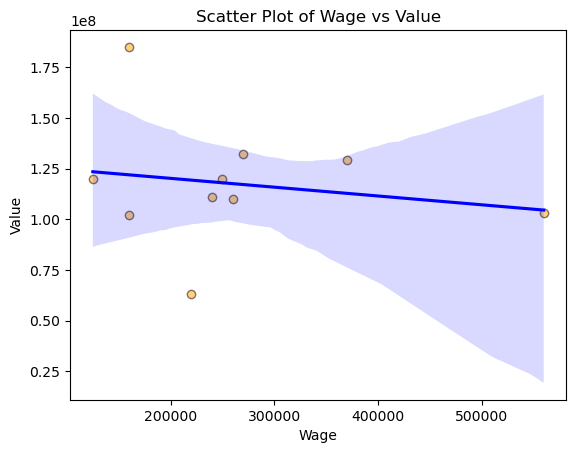

In [224]:
# Execute an SQL query to select the "Value" and "Wage" columns
cursor.execute("SELECT Value, Wage FROM fifa_data_cleaning LIMIT 10")

# Fetch the results into a list of tuples
results = cursor.fetchall()
# Extract "Value" and "Wage" values into separate lists and convert them to numeric
Value = [float(result[0]) for result in results]
Wage = [float(result[1]) for result in results]

# Create a scatter plot using Seaborn
sns.regplot(x=Wage, 
            y=Value, 
            scatter_kws={'edgecolor': 'black', 'linewidth': 1, 'alpha': 0.5, 'color': 'orange'},
            line_kws={'color': 'blue'}
           )

plt.xlabel('Wage')
plt.ylabel('Value')
plt.title('Scatter Plot of Wage vs Value')
plt.show()


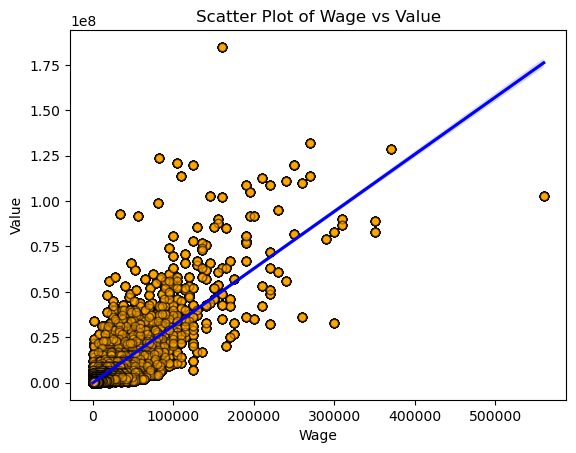

In [226]:
# Execute an SQL query to select the "Value" and "Wage" columns
cursor.execute("SELECT Value, Wage FROM fifa_data_cleaning ")

# Fetch the results into a list of tuples
results = cursor.fetchall()

# Close the database connection


# Extract "Value" and "Wage" values into separate lists
Value = [float(result[0]) for result in results]
Wage = [float(result[1]) for result in results]

# Create a scatter plot using Seaborn
sns.regplot(x=Wage, 
            y=Value, 
            scatter_kws={'edgecolor': 'black', 'linewidth': 1, 'alpha': 0.5, 'color': 'orange'},
            line_kws={'color': 'blue'}
           )

plt.xlabel('Wage')
plt.ylabel('Value')
plt.title('Scatter Plot of Wage vs Value')
plt.show()


# Which players are highly valuable but still underpaid (on low wages)? (scatter plot between wage and value)

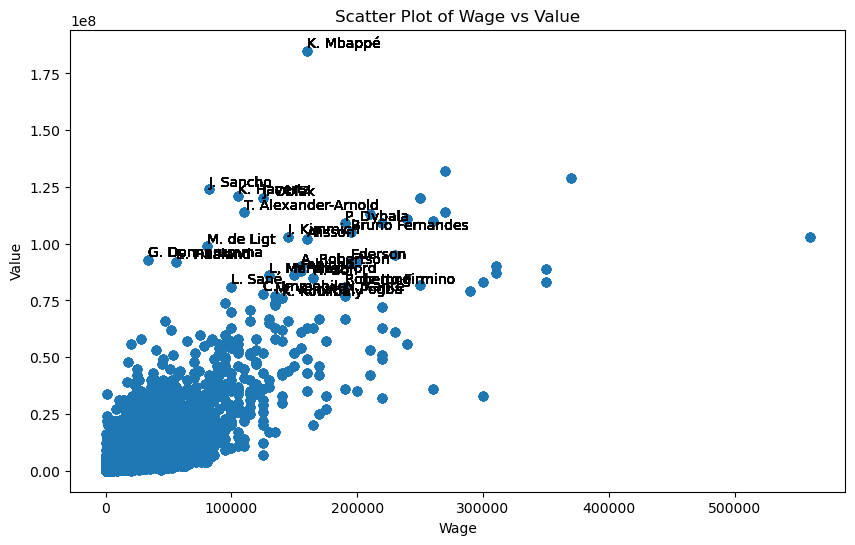

In [229]:
# Execute an SQL query to select the "Name," "Value," and "Wage" columns
cursor.execute("SELECT Name, Value, Wage FROM fifa_data_cleaning")

# Fetch the results into a list of tuples
results = cursor.fetchall()

# Extract "Value" and "Wage" values into separate lists
Value = [float(result[1]) for result in results]
Wage = [float(result[2]) for result in results]

# Create a scatter plot to visualize the relationship between "Value" and "Wage"
plt.figure(figsize=(10, 6))
plt.scatter(Wage, Value, alpha=0.5)
plt.title('Scatter Plot of Wage vs Value')
plt.xlabel('Wage')
plt.ylabel('Value')

# Define a threshold for high value and low wage
high_value_threshold = 75000000  # Adjust this threshold based on your definition of "high value"
low_wage_threshold = 200000  # Adjust this threshold based on your definition of "low wage"

# Highlight players who are highly valuable but still underpaid
for i in range(len(Value)):
    if Value[i] > high_value_threshold and Wage[i] < low_wage_threshold:
        plt.text(Wage[i], Value[i], results[i][0], fontsize=10, ha='left', va='bottom')

plt.show()


         At what age do players tend to be highly valuable but still underpaid?

In [234]:
cursor.execute("select Age,Wage, Value from fifa_data_cleaning ")
results = cursor.fetchall()
column_names = [asc[0] for asc in cursor.description]
# Print column names
print(column_names)
for x in results:
    print(x)

['Age', 'Wage', 'Value']
(33, '560000', '103000000')
(35, '220000', '63000000')
(27, '125000', '120000000')
(29, '370000', '129000000')
(28, '270000', '132000000')
(31, '240000', '111000000')
(28, '250000', '120000000')
(27, '160000', '102000000')
(21, '160000', '185000000')
(28, '260000', '110000000')
(28, '210000', '113000000')
(28, '250000', '120000000')
(28, '310000', '90000000')
(28, '250000', '82000000')
(34, '130000', '17000000')
(32, '350000', '83000000')
(34, '300000', '33000000')
(32, '300000', '83000000')
(25, '270000', '114000000')
(29, '190000', '78000000')
(25, '145000', '103000000')
(26, '190000', '109000000')
(26, '195000', '92000000')
(26, '220000', '109000000')
(35, '100000', '10000000')
(29, '140000', '76000000')
(29, '350000', '89000000')
(30, '310000', '87000000')
(29, '290000', '79000000')
(20, '82000', '124000000')
(21, '110000', '114000000')
(25, '230000', '95000000')
(26, '155000', '90000000')
(26, '200000', '92000000')
(25, '195000', '105000000')
(26, '155000'

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



(23, '950', '500000')
(26, '2000', '300000')
(25, '950', '325000')
(21, '1000', '575000')
(25, '2000', '325000')
(21, '1000', '600000')
(19, '3000', '600000')
(19, '500', '575000')
(20, '600', '575000')
(20, '500', '550000')
(23, '600', '475000')
(17, '500', '600000')
(17, '2000', '675000')
(20, '500', '500000')
(32, '500', '200000')
(26, '500', '300000')
(21, '2000', '600000')
(22, '2000', '550000')
(19, '2000', '550000')
(18, '3000', '750000')
(18, '750', '750000')
(19, '2000', '550000')
(23, '4000', '550000')
(22, '1000', '550000')
(22, '650', '575000')
(21, '5000', '600000')
(20, '650', '475000')
(22, '2000', '550000')
(24, '2000', '375000')
(19, '2000', '525000')
(22, '5000', '475000')
(24, '2000', '500000')
(27, '6000', '250000')
(22, '2000', '550000')
(24, '550', '325000')
(25, '8000', '325000')
(18, '500', '575000')
(31, '2000', '200000')
(20, '2000', '650000')
(18, '3000', '650000')
(20, '2000', '500000')
(19, '1000', '500000')
(25, '500', '450000')
(33, '2000', '150000')
(17,

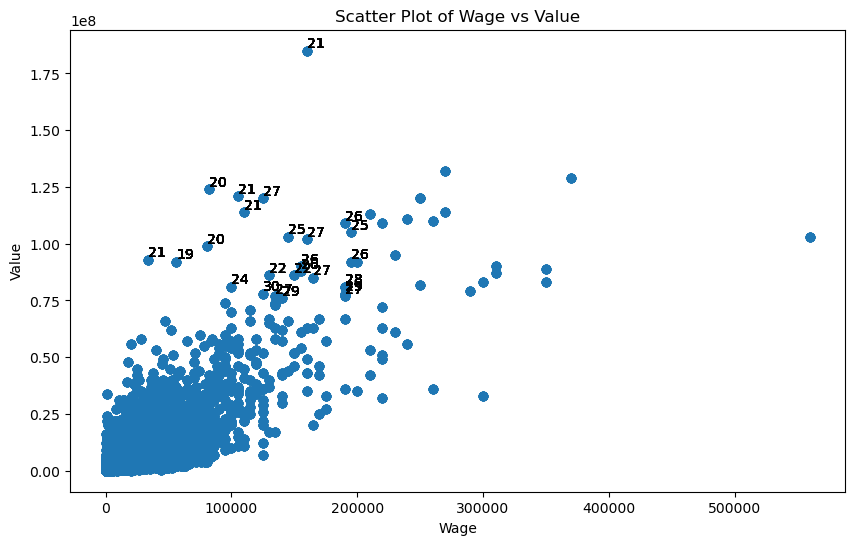

In [235]:
# Execute an SQL query to select the "Name," "Value," and "Wage" columns
cursor.execute("SELECT Age, Value, Wage FROM fifa_data_cleaning")

# Fetch the results into a list of tuples
results = cursor.fetchall()

# Extract "Value" and "Wage" values into separate lists
Value = [float(result[1]) for result in results]
Wage = [float(result[2]) for result in results]

# Create a scatter plot to visualize the relationship between "Value" and "Wage"
plt.figure(figsize=(10, 6))
plt.scatter(Wage, Value, alpha=0.5)
plt.title('Scatter Plot of Wage vs Value')
plt.xlabel('Wage')
plt.ylabel('Value')

# Define a threshold for high value and low wage
high_value_threshold = 75000000  # Adjust this threshold based on your definition of "high value"
low_wage_threshold = 200000  # Adjust this threshold based on your definition of "low wage"

# Highlight players who are highly valuable but still underpaid
for i in range(len(Value)):
    if Value[i] > high_value_threshold and Wage[i] < low_wage_threshold:
        plt.text(Wage[i], Value[i], results[i][0], fontsize=10, ha='left', va='bottom')

plt.show()
